In [97]:
import random as rnd
import matplotlib.pyplot as plt
from math import exp as exp
from math import log as log
from math import sqrt as sqrt
import numpy as np
import pandas as pd

In [98]:
#calculate the energy of 2 particles on a lattice. It can be -5 if the distance is 1, -3.5 if the distance is sqrt(2)
# and 0 if the distance is > sqrt(2)
def Energy(coord_1, coord_2):
    if sqrt((coord_1[0]-coord_2[0])**2+(coord_1[1]-coord_2[1])**2) == 1.0:
        E = -5
    elif sqrt((coord_1[0]-coord_2[0])**2+(coord_1[1]-coord_2[1])**2) == sqrt(2):
        E = -3.5
    else:
        E = 0
    return E


In [99]:
class Particles():
    def __init__(self):
        #generate starting coordinates
        self.start_pos_1 = np.random.randint(low = 0, high = 10, size = 2)
        self.start_pos_2 = np.random.randint(low = 0, high = 10, size = 2)
        #cheking self-interference and hoping it won't generate the same 2 coords twice in a row
        if (self.start_pos_2 == self.start_pos_1).all():
            self.start_pos_2 = np.random.randint(low = 0, high = 10, size = 2)
        self.start_E = Energy(self.start_pos_1, self.start_pos_2)
        #saving the treks to follow them later on
        self.coordinate_trek_1 = []
        self.coordinate_trek_2 = []
        self.Energy_trek = []
        self.Temp = float(input('Enter the temperature'))

    def update(self):
        old_pos_1 = self.start_pos_1
        old_pos_2 = self.start_pos_2
        counter = 0
        old_E = self.start_E
        # a somewhat working Metropolis-Hastings algorithm
        # randomly pick a particle 
        # randomly assign it to a new lattice vertex
        # generate a random number for comparison, then compare with the energy factor k = exp((E1-E2)/T)
        # compare the former and the latter, if u <= k then accept the new state, otherwise remain in the old state
        while (counter < 10000):
            particle_choice = rnd.randint(1,2)
            if particle_choice == 1:
                new_pos_1 = np.random.randint(low = 0, high = 10, size = 2)
                if (new_pos_1 == old_pos_2).all():
                    new_pos_1 = np.random.randint(low = 0, high = 10, size = 2)
                new_E = Energy(new_pos_1, old_pos_2)
                k = exp((old_E - new_E)/self.Temp)
                u = rnd.uniform(0,1)
                if u <= k:
                    old_E = new_E
                    old_pos_1 = new_pos_1
                    print(old_pos_1, old_pos_2)
                    self.Energy_trek.append(old_E)
                    self.coordinate_trek_1.append(old_pos_1)
                    self.coordinate_trek_2.append(old_pos_2)
                else:
                    print(old_pos_1, old_pos_2)
                    self.Energy_trek.append(old_E)
                    self.coordinate_trek_1.append(old_pos_1)
                    self.coordinate_trek_2.append(old_pos_2)

            elif particle_choice == 2:
                new_pos_2 = np.random.randint(low = 0, high = 10, size = 2)
                if (new_pos_2 == old_pos_1).all():
                    new_pos_2 = np.random.randint(low = 0, high = 10, size = 2)
                new_E = Energy(new_pos_2, old_pos_1)
                k = exp((old_E-new_E)/self.Temp)
                u = rnd.uniform(0,1)
                if u <= k:
                    old_E = new_E
                    old_pos_2 = new_pos_2
                    print(old_pos_1, old_pos_2)
                    self.Energy_trek.append(old_E)
                    self.coordinate_trek_1.append(old_pos_1)
                    self.coordinate_trek_2.append(old_pos_2)
                else:
                    print(old_pos_1, old_pos_2)
                    self.Energy_trek.append(old_E)
                    self.coordinate_trek_1.append(old_pos_1)
                    self.coordinate_trek_2.append(old_pos_2)
            counter +=1



In [107]:
test = Particles()
print(test.start_pos_1, test.start_pos_2)
test.update()


[6 8] [4 8]
[3 9] [4 8]
[2 1] [4 8]
[1 2] [4 8]
[9 6] [4 8]
[6 8] [4 8]
[6 8] [7 3]
[6 8] [1 8]
[4 4] [1 8]
[4 4] [2 9]
[4 4] [1 5]
[4 4] [8 2]
[0 6] [8 2]
[9 7] [8 2]
[9 7] [9 0]
[8 3] [9 0]
[8 3] [9 1]
[7 4] [9 1]
[3 2] [9 1]
[9 0] [9 1]
[9 0] [5 7]
[3 5] [5 7]
[3 5] [0 4]
[3 5] [7 4]
[3 1] [7 4]
[3 1] [6 9]
[1 0] [6 9]
[6 6] [6 9]
[6 6] [9 4]
[6 6] [3 5]
[5 8] [3 5]
[5 8] [7 7]
[1 9] [7 7]
[1 9] [3 8]
[1 9] [1 5]
[1 9] [3 1]
[1 9] [4 3]
[9 5] [4 3]
[9 5] [5 3]
[9 5] [1 7]
[9 5] [3 9]
[9 5] [3 3]
[2 2] [3 3]
[2 2] [0 4]
[2 2] [7 6]
[6 1] [7 6]
[6 1] [5 7]
[6 1] [1 7]
[6 1] [4 7]
[6 1] [3 6]
[6 1] [5 9]
[2 7] [5 9]
[9 3] [5 9]
[5 4] [5 9]
[6 4] [5 9]
[9 2] [5 9]
[6 6] [5 9]
[8 1] [5 9]
[0 5] [5 9]
[0 5] [2 4]
[5 1] [2 4]
[2 3] [2 4]
[2 3] [8 0]
[2 3] [6 5]
[0 9] [6 5]
[2 9] [6 5]
[2 9] [6 9]
[2 9] [7 2]
[4 7] [7 2]
[0 3] [7 2]
[0 3] [6 4]
[0 3] [8 2]
[1 0] [8 2]
[1 0] [7 6]
[1 0] [2 8]
[1 0] [7 3]
[1 0] [2 6]
[2 3] [2 6]
[3 0] [2 6]
[6 0] [2 6]
[6 0] [8 4]
[9 7] [8 4]
[9 7] [4 4]
[1 0

In [90]:
#calculate distance for cordinate trek d = sqrt((x1-x2)^2+(y1-y2)^2)
def distance_calculator(arr_1, arr_2):
    distance_arr = []
    if len(arr_1)!=len(arr_2):
        print('Error, different path lengths')
    else:
        for i in range(len(arr_1)):
            distance_arr.append(sqrt((arr_1[i][0]-arr_2[i][0])**2+(arr_1[i][1]-arr_2[i][1])**2))
    return distance_arr


In [108]:
def Average_value(A_arr, E_arr, T):
    weights = [exp(E/T) for E in E_arr]
    weights_sum = sum(weights)
    A_avg = 0
    for i in range(len(A_arr)):
        A_avg += A_arr[i]*weights[i]
    A_avg = A_avg/weights_sum
    return A_avg
    
def Entropy(E_arr, T):
    weights = [exp(E/T) for E in E_arr]
    S = 0
    for i in weights:
        S+= -i*log(i)
    return S
distance = distance_calculator(test.coordinate_trek_1, test.coordinate_trek_2)
print('Average energy = ', Average_value(test.Energy_trek, test.Energy_trek, test.Temp))
print('Average distance = ', Average_value(distance, test.Energy_trek, test.Temp))
print('Ensemble entropy = ', Entropy(test.Energy_trek, test.Temp))

Average energy =  -0.2982286532029218
Average distance =  5.237112545384368
Ensemble entropy =  146.6673701794119


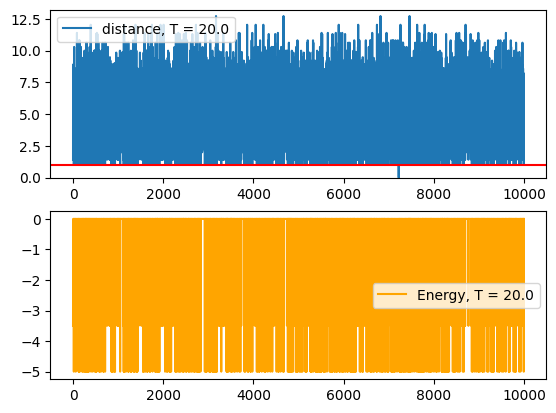

In [109]:
fig, axs = plt.subplots(nrows=2, ncols=1)

axs[0].plot(distance, label='distance, T = '+str(test.Temp))
axs[0].axhline(y = 1, color = 'r', linestyle = '-') 
axs[0].set_ylim([0, max(distance)+0.5])
axs[0].legend()
axs[1].plot(test.Energy_trek, label='Energy, T = '+str(test.Temp), color = 'orange')
axs[1].legend()

plt.show()